<img heigth="8" src="https://i.imgur.com/3mimh4M.png" alt="guane">

<h1 align="left">Data Science and Machine Learning</h1>

<p align="left"><i>A Data Project Template for Building Robust, Reproducible and Maintainable Predictive Solutions</i></p>

<p align="left">
  DS&ML Team | <a href="https://guane.com.co/">guane enterprises</a>
  <br>
  <b>Last updated:</b> <i>06/03/2023</i>
  <br><br>
  <a target="_blank">
    <img src="https://github.com/QData/TextAttack/workflows/Github%20PyTest/badge.svg" alt="Testing">
  </a>
  <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
    <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
  </a>
</p><br>
<p align="left">
  <a href="#introduction">Introduction</a><br>
  <a href="#1-data-adquisition">1. Data Adquisition</a><br>
  <a href="#2-exploratory-data-analysis">2. Exploratory Data Analysis</a><br>
  <a href="#3-training-models">3. Training Models</a><br>
  <br>
</p>

---

With this notebook you can test the template to develop your predictive solution.

<a id="1-data-extraction"></a>
## Introduction

In [2]:
#Se comenta por ahora para no tener que estar reiniciando el kernel.

# import os
# try:
#     import importlib

#     __package__ = "src"

#     found = False
#     while not found:
#         os.chdir(os.path.join(os.getcwd(), os.pardir))
#         found = bool(importlib.util.find_spec(__package__))
#         if found:
#             print(f"[INFO] WORKDIR: {os.path.join(os.getcwd(), os.pardir)}")
#         continue
# except ModuleNotFoundError as e:
#     print("[ERROR] Verify WORKDIR execution: ", e)


#Instead, we will use the following code to add the path to the sys.path
import sys
sys.path.append("..")

In [3]:
import src
from src.utils import set_seed_everything

print(f"[INFO] Package version: {src.__version__}")

[INFO] Package version: v0.1.0


In [4]:
SEED = 20180507
set_seed_everything(SEED)

<a id="1-model-family-settings-validation"></a>
## 1. Data Adquisition

For the initial data adquisition, we run the dataloader script from scripts. This extracts the files from the zip downloaded in datalake and then we proceed to read the data here.

In [5]:
import pandas as pd

data = pd.read_parquet("../datalake/out-of-stock/out-of-stock/train.parquet")

## About this file

### Training dataset

#### Column descriptors
- **sku**: stock keeping unit. SKU is a combination of an item and a variation.
- **date**: YYYY-MM-DD
- **sold_quantity**: number of units of the corresponding SKU that were sold on that particular date.
- **current_price**: point in time correct SKU's price.
- **currency**: currency in which the price is expressed. Possible values are ARG, DOL, MEX, and REA.
- **listing_type**: type of listing the SKU had for that particular date. Possible values are classic or premium and they relate to the exposure the items have and the fee charged to the seller as a sales commission. Another important advantage for an item listed as premium is its capability to pay in installments without interest rate.
- **shipping_logistic_type**: type of shipping method the SKU offered, for that particular date. Possible values are fulfillment, cross_docking, and drop_off.
- **shipping_payment**: whether the shipping for the offered SKU at that particular date was free or paid, from the buyer's perspective.
- **minutes_active**: number of minutes the SKU was available for purchase on that particular date.


source: https://www.kaggle.com/code/hubot01/melidata21-workshop/input?select=meli_train_data.parquet

Our goal is to construct a probability distribution of a product being sold in the next 30 days since available for purchase.

In [6]:
data

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
0,464801,2021-02-01,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
1,464801,2021-02-02,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
2,464801,2021-02-03,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
3,464801,2021-02-04,0,156.78,REA,classic,fulfillment,free_shipping,1440.000000
4,464801,2021-02-05,1,156.78,REA,classic,fulfillment,free_shipping,1440.000000
...,...,...,...,...,...,...,...,...,...
37660274,129187,2021-03-31,0,22057.00,ARG,classic,drop_off,free_shipping,267.710767
37660275,6707,2021-03-31,0,26999.00,ARG,classic,cross_docking,free_shipping,266.083333
37660276,170355,2021-03-31,0,3400.00,ARG,classic,drop_off,paid_shipping,0.252633
37660277,246568,2021-03-31,0,6289.00,ARG,classic,fulfillment,free_shipping,135.416667


<a id="2-exploratory-data-analysis"></a>
## 2. Exploratory Data Analysis

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37660279 entries, 0 to 37660278
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   sku                     int64  
 1   date                    object 
 2   sold_quantity           int64  
 3   current_price           float64
 4   currency                object 
 5   listing_type            object 
 6   shipping_logistic_type  object 
 7   shipping_payment        object 
 8   minutes_active          float64
dtypes: float64(2), int64(2), object(5)
memory usage: 2.5+ GB


In [8]:
data.describe()

,sku,sold_quantity,current_price,minutes_active
count,3.766028e+07,3.766028e+07,3.766028e+07,3.766028e+07
mean,3.303739e+05,9.900934e-01,2.357780e+03,1.043415e+03
std,1.907922e+05,9.989535e+00,1.263914e+06,6.302455e+02
min,0.000000e+00,0.000000e+00,8.700000e-01,0.000000e+00
25%,1.651250e+05,0.000000e+00,4.870000e+01,0.000000e+00
50%,3.303800e+05,0.000000e+00,1.190000e+02,1.440000e+03
75%,4.955960e+05,1.000000e+00,2.985900e+02,1.440000e+03
max,6.609150e+05,6.951000e+03,1.000000e+09,1.440000e+03


In [9]:
data["date"] = pd.to_datetime(data["date"])

In [10]:
#Checking for missing values and if data types are correct
nan_and_dtypes = pd.DataFrame({
    "nan": data.isna().sum(),
    "dtype": data.dtypes,
    "nunique": data.nunique()
})
nan_and_dtypes

,nan,dtype,nunique
sku,0,int64,660916
date,0,datetime64[ns],59
sold_quantity,0,int64,1396
current_price,0,float64,140924
currency,0,object,4
listing_type,0,object,2
shipping_logistic_type,0,object,3
shipping_payment,0,object,2
minutes_active,0,float64,1009253


We have 660916 unique sku's

In [11]:
data["sku"].value_counts()

464801    59
577879    59
7567      59
293613    59
6396      59
          ..
425593     1
245107     1
384501     1
579285     1
49718      1
Name: sku, Length: 660916, dtype: int64

Most of them have almost 60 entries in the dataset

<Axes: >

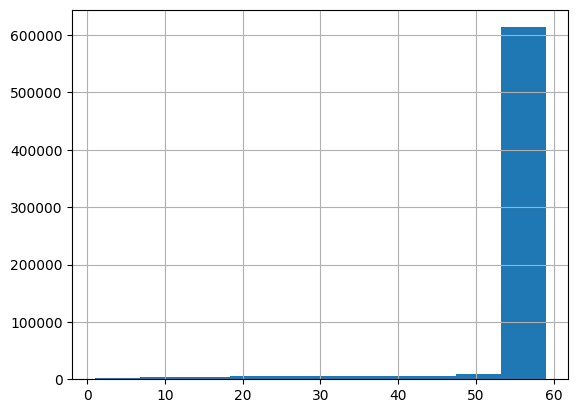

In [12]:
data["sku"].value_counts().hist()

In [13]:
data["date"].min(), data["date"].max(), data["date"].max() - data["date"].min()

(Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-31 00:00:00'),
 Timedelta('58 days 00:00:00'))

These entries tell us how the price of the product changes overtime, how many units are sold and how some other categorical features change over 59 days.

In [14]:
data[data["sku"] == 97604]

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
34381015,97604,2021-03-23,0,485.0,MEX,premium,cross_docking,free_shipping,343.383333
34381016,97604,2021-03-24,0,485.0,MEX,premium,cross_docking,free_shipping,1440.000000
34381017,97604,2021-03-25,2,485.0,MEX,premium,cross_docking,free_shipping,1418.824800
34381018,97604,2021-03-26,7,485.0,MEX,premium,fulfillment,free_shipping,1440.000000
34381019,97604,2021-03-27,10,485.0,MEX,premium,fulfillment,free_shipping,1440.000000
34381020,97604,2021-03-28,5,485.0,MEX,premium,fulfillment,free_shipping,1440.000000
34381021,97604,2021-03-29,5,485.0,MEX,premium,fulfillment,free_shipping,830.983333
34381022,97604,2021-03-30,0,485.0,MEX,premium,fulfillment,free_shipping,0.000000
34381023,97604,2021-03-31,0,485.0,MEX,premium,fulfillment,free_shipping,0.000000


The sku-date pair being unique tells us that, for a given sku, each entry is a different date.

In [15]:
tmp = data[["sku", "date"]].value_counts()
tmp[tmp > 1]

Series([], dtype: int64)

Ouf-of-stock event definition

For some of these dates, the sku had less than 1440 minutes_active (remember that a day has 1440 minutes), which tells us that the product was not available for purchase. This will be interpreted as an out-of-stock event (ose).

In [16]:
data[data["minutes_active"] < 1440]["sku"].value_counts()

200820    59
87982     59
502247    59
216330    59
374416    59
          ..
407621     1
8987       1
302674     1
188337     1
49718      1
Name: sku, Length: 542010, dtype: int64

542010

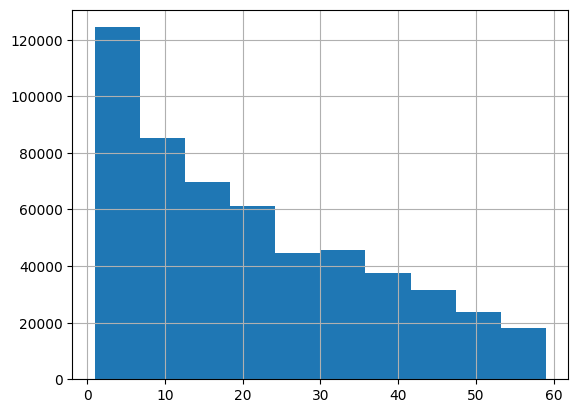

In [17]:
data[data["minutes_active"] < 1440]["sku"].value_counts().hist()
data[data["minutes_active"] < 1440]["sku"].nunique()

<Axes: >

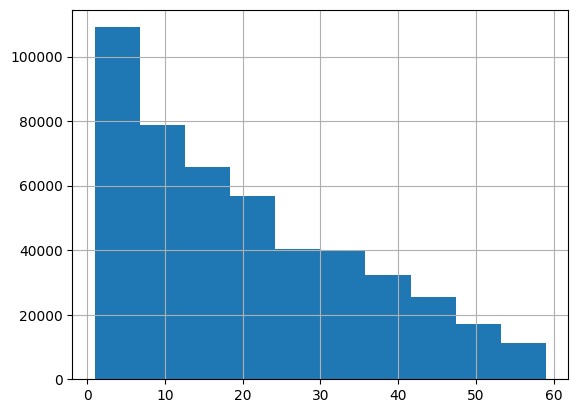

In [18]:
data[data["minutes_active"] == 0].groupby("sku").size().hist()

In [19]:
unique_minutes_active_by_sku = data.groupby("sku").agg({
    "minutes_active": "unique"
})
more_than_one_minutes_active_by_sku = unique_minutes_active_by_sku[unique_minutes_active_by_sku["minutes_active"].apply(lambda x: len(x) == 1)]
skus_never_available = more_than_one_minutes_active_by_sku[more_than_one_minutes_active_by_sku["minutes_active"].apply(lambda x: x[0] == 0)]
skus_to_remove = skus_never_available.index.to_list()

In [20]:
len(skus_to_remove)

6186

542010 out of 660916 (82%) of the sku's did have at lease one ose during those 59 days and, out of that 82% of sku's, 6186 had an ose in all of their days (they were never available). These last will be considered as atypical and won't be taken into account for the analysis since we're insterested in finding out how many days will pass before an **initially** available product goes out of stock.

In [21]:
skus_with_ose = data[data["minutes_active"] < 1440]["sku"].unique().tolist()

In [22]:
data_with_ose = data[data["sku"].isin(skus_with_ose) & ~data["sku"].isin(skus_to_remove)]

In [23]:
data_with_ose

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active
59,645793,2021-02-01,0,134.23,REA,classic,fulfillment,free_shipping,1440.000000
60,645793,2021-02-02,0,134.23,REA,classic,fulfillment,free_shipping,1440.000000
61,645793,2021-02-03,2,145.90,REA,classic,fulfillment,free_shipping,1440.000000
62,645793,2021-02-04,1,145.90,REA,classic,fulfillment,free_shipping,1440.000000
63,645793,2021-02-05,0,145.90,REA,classic,fulfillment,free_shipping,1440.000000
...,...,...,...,...,...,...,...,...,...
37660274,129187,2021-03-31,0,22057.00,ARG,classic,drop_off,free_shipping,267.710767
37660275,6707,2021-03-31,0,26999.00,ARG,classic,cross_docking,free_shipping,266.083333
37660276,170355,2021-03-31,0,3400.00,ARG,classic,drop_off,paid_shipping,0.252633
37660277,246568,2021-03-31,0,6289.00,ARG,classic,fulfillment,free_shipping,135.416667


Now we have to construct our target variable before thinking about training any models. We need to find out how many days passed since the product was available until it got out of stock.

In [24]:
data_with_ose["sku"].value_counts()

645793    59
576659    59
223799    59
562428    59
497674    59
          ..
14723      1
560085     1
84571      1
220265     1
49718      1
Name: sku, Length: 535824, dtype: int64

In [25]:
mocked_df = data_with_ose.groupby("sku").agg({
    "date": "min"
})
mocked_df["date"] = mocked_df["date"] - pd.Timedelta(days=1)
mocked_df["minutes_active"] = 0.0

In [31]:
data_with_ose_mocked = pd.concat([data_with_ose, mocked_df.reset_index()]).sort_values(["sku", "date"])

In [42]:
data_with_ose_mocked["scope"] = data_with_ose_mocked["minutes_active"].diff()
data_with_ose_mocked["ose"] = data_with_ose_mocked.apply(lambda x: 1 if (x["minutes_active"] not in [0, 1440]) and (x["scope"] != 0) else 0, axis=1)

In [47]:
data_with_ose_mocked.to_parquet("../storage/data/data_with_ose_mocked.parquet")

In [48]:
data_with_ose_mocked = pd.read_parquet("../storage/data/data_with_ose_mocked.parquet")

In [49]:
data_with_ose_mocked[data_with_ose_mocked["sku"] == 645793]

,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active,scope,ose
index,,,,,,,,,,,
523574,645793,2021-01-31,NaN,NaN,None,None,None,None,0.000000,0.000000,0
59,645793,2021-02-01,0.0,134.23,REA,classic,fulfillment,free_shipping,1440.000000,1440.000000,0
60,645793,2021-02-02,0.0,134.23,REA,classic,fulfillment,free_shipping,1440.000000,0.000000,0
61,645793,2021-02-03,2.0,145.90,REA,classic,fulfillment,free_shipping,1440.000000,0.000000,0
62,645793,2021-02-04,1.0,145.90,REA,classic,fulfillment,free_shipping,1440.000000,0.000000,0
63,645793,2021-02-05,0.0,145.90,REA,classic,fulfillment,free_shipping,1440.000000,0.000000,0
64,645793,2021-02-06,1.0,145.90,REA,classic,fulfillment,free_shipping,1440.000000,0.000000,0
65,645793,2021-02-07,1.0,149.99,REA,classic,fulfillment,free_shipping,1440.000000,0.000000,0
66,645793,2021-02-08,2.0,151.49,REA,classic,fulfillment,free_shipping,1440.000000,0.000000,0


/tmp/ipykernel_37336/1114938520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["scope"] = tmp["minutes_active"].diff()


,sku,date,sold_quantity,current_price,currency,listing_type,shipping_logistic_type,shipping_payment,minutes_active,scope
37660278,49718,2021-03-31,0,1990.0,ARG,classic,drop_off,paid_shipping,88.033333,NaN


An ose is characterized by having less than 1440 minutes_active and being preceded by a full day of the product being active (unless the product got out of stock the same day it was published. Case in which the ose is preceded by a full day of the product not being active). We'll have to trace back for each product, for each one of its ose's, which is the initial day and which is the day of the ose.

<a id="3-training-models"></a>
## 3. Training Models